<a href="https://colab.research.google.com/github/zsh88/Machine-Learning-Projects-/blob/main/spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning and Preprocessing

## Load the Data

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Datasets/spam_email.csv')

## Handling Missing Values

In [ ]:
data.isnull().sum()

label    0
text     0
dtype: int64

## Text Cleaning

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stop words and non-alphabetic characters
    words = [word for word in words if word.isalpha() and word not in stop_words]
    # Join the words back into a string
    cleaned_text = ' '.join(words)
    return cleaned_text

# Apply text cleaning to the 'text' column
data['cleaned_text'] = data['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['cleaned_text'], data['label'], test_size=0.2, random_state=42)


# Exploratory Data Analysis (EDA)

## Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##  Basic Overview of the Data

In [ ]:
# Display the first few rows of the dataset
print(data.head())

# Display basic statistics of numerical columns
print(data.describe())

# Check the data types and non-null counts
print(data.info())

   label                                               text  \
0      1  ounce feather bowl hummingbird opec moment ala...   
1      1  wulvob get your medircations online qnb ikud v...   
2      0   computer connection from cnn com wednesday es...   
3      1  university degree obtain a prosperous future m...   
4      0  thanks for all your answers guys i know i shou...   

                                        cleaned_text  
0  ounce feather bowl hummingbird opec moment ala...  
1  wulvob get medircations online qnb ikud viagra...  
2  computer connection cnn com wednesday escapenu...  
3  university degree obtain prosperous future mon...  
4  thanks answers guys know checked rsync manual ...  
              label
count  83448.000000
mean       0.526196
std        0.499316
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 3 columns):
 # 

## Class Distribution

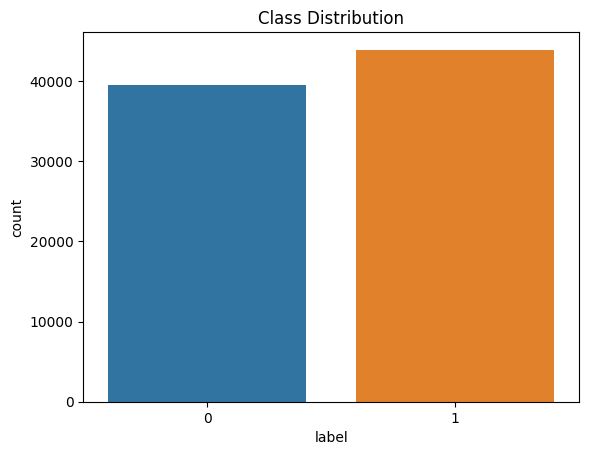

In [ ]:
# Visualize the distribution of the 'label' column
sns.countplot(x='label', data=data)
plt.title('Class Distribution')
plt.show()

## Text Length Analysis

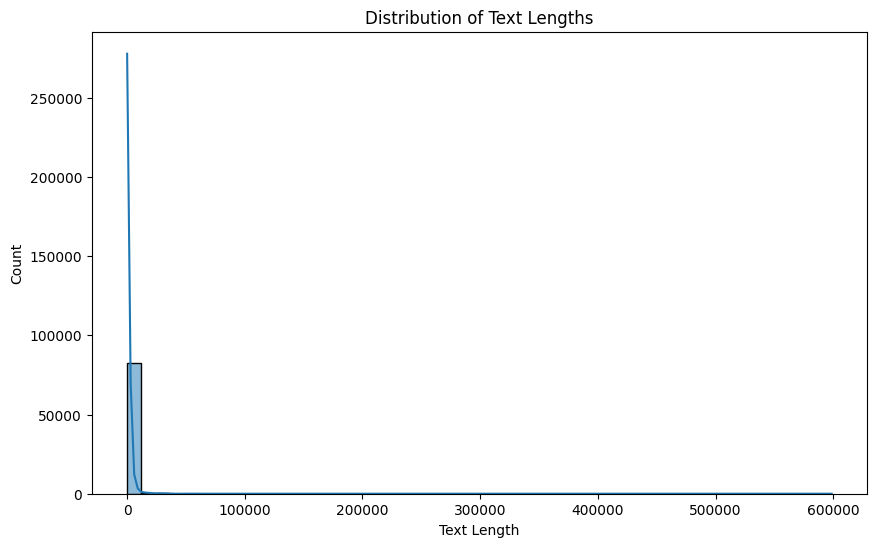

In [ ]:
# Analyze the distribution of text lengths
data['text_length'] = data['text'].apply(len)

# Plot a histogram of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(data['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.show()

## Word Count Analysis

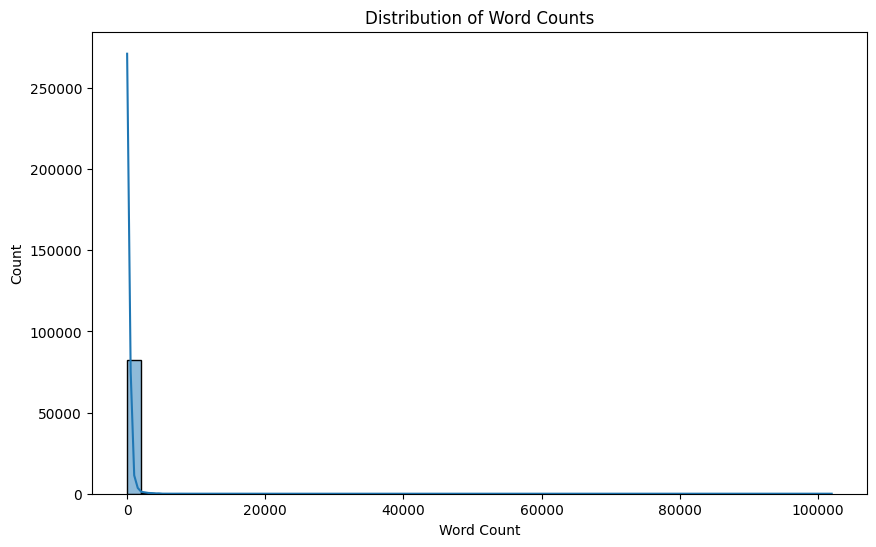

In [ ]:
# Analyze the distribution of word counts
data['word_count'] = data['text'].apply(lambda x: len(x.split()))

# Plot a histogram of word counts
plt.figure(figsize=(10, 6))
sns.histplot(data['word_count'], bins=50, kde=True)
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.show()


## Word Cloud for Spam and Non-Spam

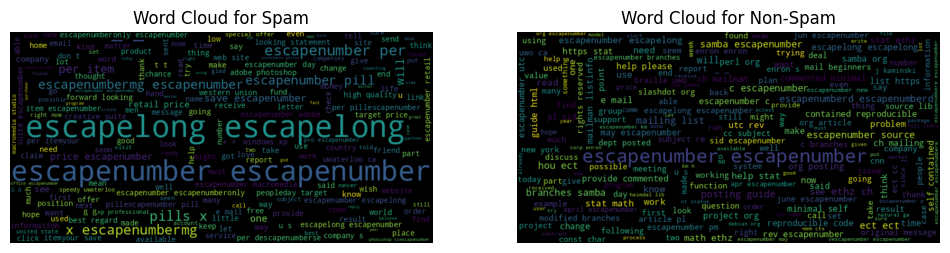

In [ ]:
from wordcloud import WordCloud

# Generate word clouds for spam and non-spam
spam_wordcloud = WordCloud(width=800, height=400).generate(' '.join(data[data['label'] == 1]['text']))
ham_wordcloud = WordCloud(width=800, height=400).generate(' '.join(data[data['label'] == 0]['text']))

# Plot the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Non-Spam')
plt.axis('off')

plt.show()

# Feature Engineering

## Text Length Feature

In [ ]:
# Create a feature representing the length of each text entry
data['text_length'] = data['text'].apply(len)

## Word Count Feature

In [ ]:
# Create a feature representing the number of words in each text entry
data['word_count'] = data['text'].apply(lambda x: len(x.split()))


##  Presence of Numeric Digits Feature

In [15]:
# Create a binary feature indicating whether each text entry contains numeric digits
data['has_digits'] = data['text'].apply(lambda x: any(char.isdigit() for char in x))


## Presence of Special Characters Feature

In [16]:
# Create a binary feature indicating whether each text entry contains special characters
special_characters = set("!@#$%^&*()_-+={}[]|\:;'<>?,./\"")
data['has_special_chars'] = data['text'].apply(lambda x: any(char in special_characters for char in x))


## Uppercase to Lowercase Ratio Feature

In [17]:
# Create a feature representing the ratio of uppercase to lowercase letters in each text entry
data['uppercase_ratio'] = data['text'].apply(lambda x: sum(1 for char in x if char.isupper()) / len(x) if len(x) > 0 else 0)


## Train-Test Split

In [18]:
from sklearn.model_selection import train_test_split

# Assuming 'label' is your target variable
X = data.drop('label', axis=1)  # Features
y = data['label']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Selection and Training



## Import Libraries

In [19]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## Text Vectorization

In [20]:
# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the max_features parameter based on your dataset size

# Fit and transform the training text data
X_train_vectorized = vectorizer.fit_transform(X_train['text'])

# Transform the test text data
X_test_vectorized = vectorizer.transform(X_test['text'])

##  Model Training

In [21]:
# Initialize the Naive Bayes model
model = MultinomialNB()

# Train the model
model.fit(X_train_vectorized, y_train)


MultinomialNB()

## Model Evaluation

In [22]:
# Predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion_mat)


Accuracy: 0.9650089874176153
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      7938
           1       0.97      0.96      0.97      8752

    accuracy                           0.97     16690
   macro avg       0.96      0.97      0.96     16690
weighted avg       0.97      0.97      0.97     16690

Confusion Matrix:
 [[7694  244]
 [ 340 8412]]
